# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [2]:
import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np

from datetime import datetime

#### 1. Carregue os dados da tarefa anterior

In [3]:
stock_raw = pd.read_parquet('data/stock.zip')
stock_raw.head()

Adj Close                             Close             \
                 AAPL       AMZN      DIS.SN       AAPL       AMZN   
Date                                                                 
2019-01-02  38.047047  76.956497  111.071373  39.480000  76.956497   
2019-01-03  34.257282  75.014000  111.071373  35.547501  75.014000   
2019-01-04  35.719700  78.769501  111.071373  37.064999  78.769501   
2019-01-07  35.640194  81.475502  111.071373  36.982498  81.475502   
2019-01-08  36.319614  82.829002  110.152451  37.687500  82.829002   

                             High                               Low  \
                DIS.SN       AAPL       AMZN      DIS.SN       AAPL   
Date                                                                  
2019-01-02  112.410004  39.712502  77.667999  112.410004  38.557499   
2019-01-03  112.410004  36.430000  76.900002  112.410004  35.500000   
2019-01-04  112.410004  37.137501  79.699997  112.410004  35.950001   
2019-01-07  112.410004  37.207500  81.727997  112.410004  36.474998   
2019-01-08  111.480003  37.955002  83.830498  111.480003  37.130001   

                                        Open                         \
                 AMZN      DIS.SN       AAPL       AMZN      DIS.SN   
Date                                                                  
2019-01-02  73.046501  112.410004  38.722500  73.260002  112.410004   
2019-01-03  74.855499  112.410004  35.994999  76.000504  112.410004   
2019-01-04  75.915497  112.410004  36.132500  76.500000  112.410004   
2019-01-07  79.459503  112.410004  37.174999  80.115501  112.410004   
2019-01-08  80.830498  111.480003  37.389999  83.234497  111.480003   

                 Volume                      
                   AAPL         AMZN DIS.SN  
Date                                         
2019-01-02  148158800.0  159662000.0    0.0  
2019-01-03  365248800.0  139512000.0    0.0  
2019-01-04  234428400.0  183652000.0    0.0  
2019-01-07  219111200.0  159864000.0    0.0  
2019-01-08  164101200.0  177628000.0   55.0

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [32]:
stock = stock_raw['Adj Close'].copy()
stock = stock.dropna()
stock_rolling = stock.rolling(90)

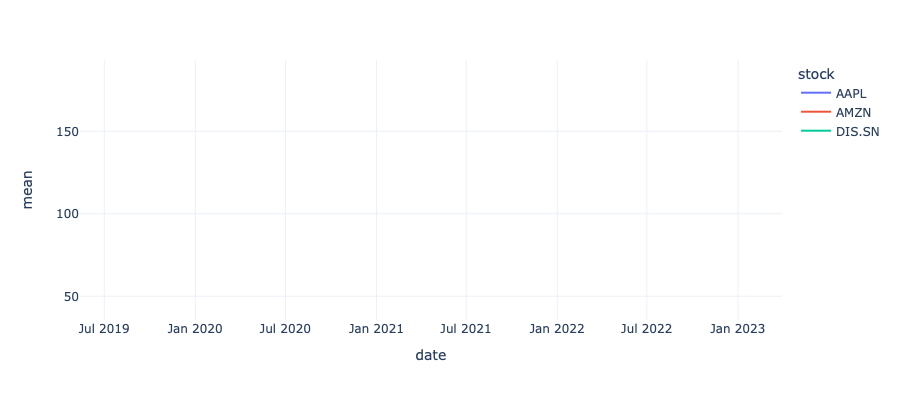

In [48]:
mean_stock = stock_rolling.mean()
mean_stock = mean_stock.stack().reset_index()
mean_stock.columns = ['date', 'stock', 'mean']

#Gráfico média
px.line(mean_stock, x="date", y="mean", color='stock', template='plotly_white', height=400)

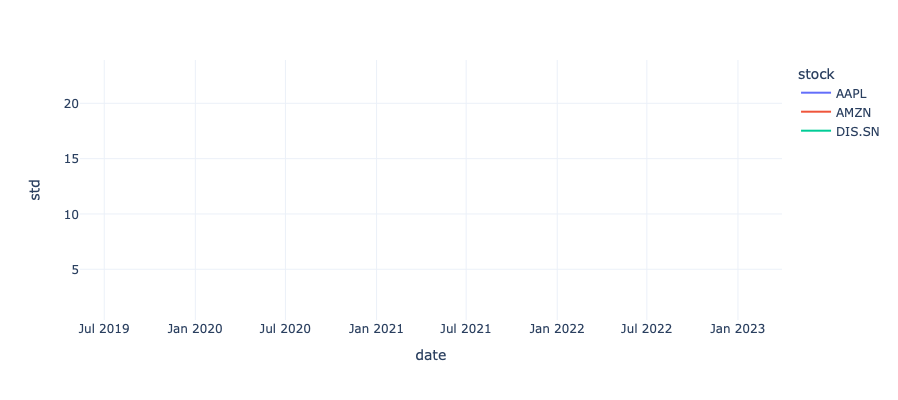

In [50]:
std_stock = stock_rolling.std()
std_stock = std_stock.stack().reset_index()
std_stock.columns = ['date', 'stock', 'std']

#Gráfico média
px.line(std_stock, x="date", y="std", color='stock', template='plotly_white', height=400)

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

[('AMZN', 'Close'), ('AMZN', 'Open'), ('AMZN', 'High'), ('AMZN', 'Low')]

In [68]:
stock_feature = ['Close', 'Open', 'High', 'Low']

stock_AMZN = stock_raw.loc[:,list(zip(stock_feature, ['AMZN' for _ in range(4)]))]
stock_AMZN.columns = stock_feature

stock_AMZN.head()

,Close,Open,High,Low
Date,,,,
2019-01-02,76.956497,73.260002,77.667999,73.046501
2019-01-03,75.014000,76.000504,76.900002,74.855499
2019-01-04,78.769501,76.500000,79.699997,75.915497
2019-01-07,81.475502,80.115501,81.727997,79.459503
2019-01-08,82.829002,83.234497,83.830498,80.830498


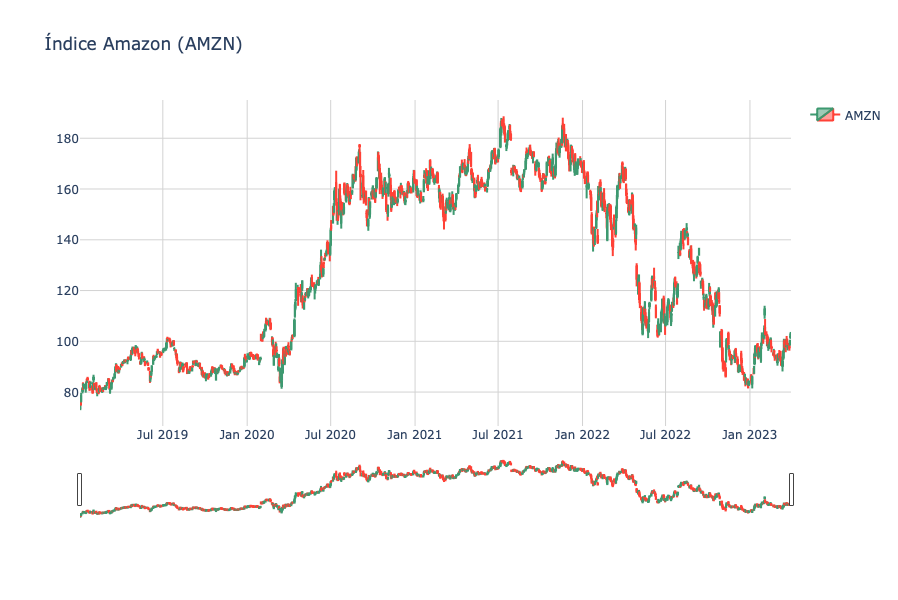

In [69]:
from plotly import graph_objects
from plotly.graph_objs import Layout

graph = {
    'x': stock_AMZN.index,
    'open': stock_AMZN.Open,
    'close': stock_AMZN.Close,
    'high': stock_AMZN.High,
    'low': stock_AMZN.Low,
    'type': 'candlestick',
    'name': 'AMZN',
    'showlegend': True
}

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    height = 600
)

grafico = graph_objects.Figure(
    data = [graph],
    layout_title="Índice Amazon (AMZN)",
    layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico